In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyshtools

# ChaosMagPy modules
from chaosmagpy import load_CHAOS_matfile
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000

comment = "SHTOOLS reconstruction from expansion into SH and re-evaluation on grid"

# Core

In [2]:
core = SDSS(comment, N_SH = 60, sim_type = "core", sat_height = 350)

core.grid_glq(nmax = 60, r_at = core.r_cmb)

grid_in = np.array([core.grid_glq_phi, 90-core.grid_glq_theta]).T
core.grid(core.r_cmb, grid_in, calc_sph_d = False)
core.generate_map()

In [3]:
print(core)


______current attributes______

a:                  6371.2
r_sat:              6721.2
r_cmb:              3480.0
rad:                0.017453292519943295
mu0:                1.2566370614359173e-06
comment:            SHTOOLS reconstruction from expansion into SH and re-evaluation on grid
class_abs_path:     /home/mikotz/spherical_direct_sequential_simulation
N_SH:               60
sim_type:           core
grid_glq_zero:      (61,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools: (61,), Max/Min: 0.05 / 0.00
grid_glq_shape:     (2,), Max/Min: 121.00 / 61.00
grid_glq_w:         (7381,), Max/Min: 0.05 / 0.00
grid_glq_radial:    (7381,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:     (7381,), Max/Min: 177.76 / 2.24
grid_glq_phi:       (7381,), Max/Min: 357.02 / 0.00
grid_glq_N:         7381
grid_glq_nmax:      60
r_grid:             3480.0
grid:               (7381, 2)
sph_d:              None
lon:                (7381,), Max/Min: 357.02 / 0.00
lat:                (7381,), Max/Min: 87.76 / -87.7

In [4]:
N_chaos = 20
CHAOS7 = load_CHAOS_matfile('lithosphere_prior/grids/models/CHAOS-7.mat')
chaos_time = mjd2000(2020, 1, 1)
g_CHAOS7 = np.hstack((np.zeros(1,),CHAOS7.synth_coeffs_tdep(chaos_time, nmax=20, deriv=0)))
cilm_CHAOS7 = pyshtools.shio.SHVectorToCilm(g_CHAOS7)

In [32]:
sh_grid_chaos7 = pyshtools.expand.MakeGridGLQ(cilm_CHAOS7, core.grid_glq_zero, [core.grid_glq_nmax, 1, 1])
g_CHAOS7_recon = pyshtools.expand.SHExpandGLQ(sh_grid_chaos7, core.grid_glq_w_shtools, core.grid_glq_zero, [1, 1, core.grid_glq_nmax])


In [33]:
cilm_CHAOS7[:,:3,:3]

array([[[     0.        ,      0.        ,      0.        ],
        [-29404.00972039,  -1451.3029074 ,      0.        ],
        [ -2499.14972411,   2981.77068595,  -2992.03581698]],

       [[     0.        ,      0.        ,      0.        ],
        [     0.        ,   4653.11132731,      0.        ],
        [     0.        ,   1676.74438293,   -735.43023532]]])

In [34]:
g_CHAOS7_recon[:,:3,:3]

array([[[ 1.91794515e-12,  0.00000000e+00,  0.00000000e+00],
        [-2.94040097e+04, -1.45130291e+03,  0.00000000e+00],
        [-2.49914972e+03,  2.98177069e+03, -2.99203582e+03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.65311133e+03,  0.00000000e+00],
        [ 0.00000000e+00,  1.67674438e+03, -7.35430235e+02]]])

In [59]:
g_CHAOS7.shape

(441,)

In [60]:
(21**2)

441

In [35]:
g_prior_cilm = np.array(pyshtools.shio.SHVectorToCilm(np.hstack((np.zeros(1,),core.g_prior))))
sh_grid = pyshtools.expand.MakeGridGLQ(g_prior_cilm, core.grid_glq_zero, [core.grid_glq_nmax, 1, 1])

In [ ]:
nm_C = mt_util.array_nm(core.grid_glq_nmax)

C_corr_sh = 1/(nm_C[:,[0]]+1)*1/((core.a/core.r_cmb)**(nm_C[:,[0]]+2))

C_index = np.transpose(pyshtools.shio.SHCilmToCindex(C_cilm))
C_index = C_index[1:,:]*C_corr_sh

C_vec = mt_util.gauss_vector(C_index, core.grid_glq_nmax, i_n = 0, i_m = 1)

In [36]:
g_prior_cilm_recon = pyshtools.expand.SHExpandGLQ(sh_grid, core.grid_glq_w_shtools, core.grid_glq_zero, [1, 1, core.grid_glq_nmax])


In [37]:
g_prior_cilm[:,:3,:3]

array([[[     0.     ,      0.     ,      0.     ],
        [-51832.174  ,   3138.7632 ,      0.     ],
        [  -172.93821,  -3074.4615 ,   5004.7084 ]],

       [[     0.     ,      0.     ,      0.     ],
        [     0.     ,    680.29256,      0.     ],
        [     0.     ,   -715.2323 ,   1198.8744 ]]])

In [38]:
g_prior_cilm_recon[:,:3,:3]

array([[[ 4.88618014e-12,  0.00000000e+00,  0.00000000e+00],
        [-5.18321740e+04,  3.13876320e+03,  0.00000000e+00],
        [-1.72938210e+02, -3.07446150e+03,  5.00470840e+03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  6.80292560e+02,  0.00000000e+00],
        [ 0.00000000e+00, -7.15232300e+02,  1.19887440e+03]]])

In [12]:
sh_grid_recon = pyshtools.expand.MakeGridGLQ(g_prior_cilm_recon, core.grid_glq_zero, [core.grid_glq_nmax, 2, 1])

<IPython.core.display.Javascript object>


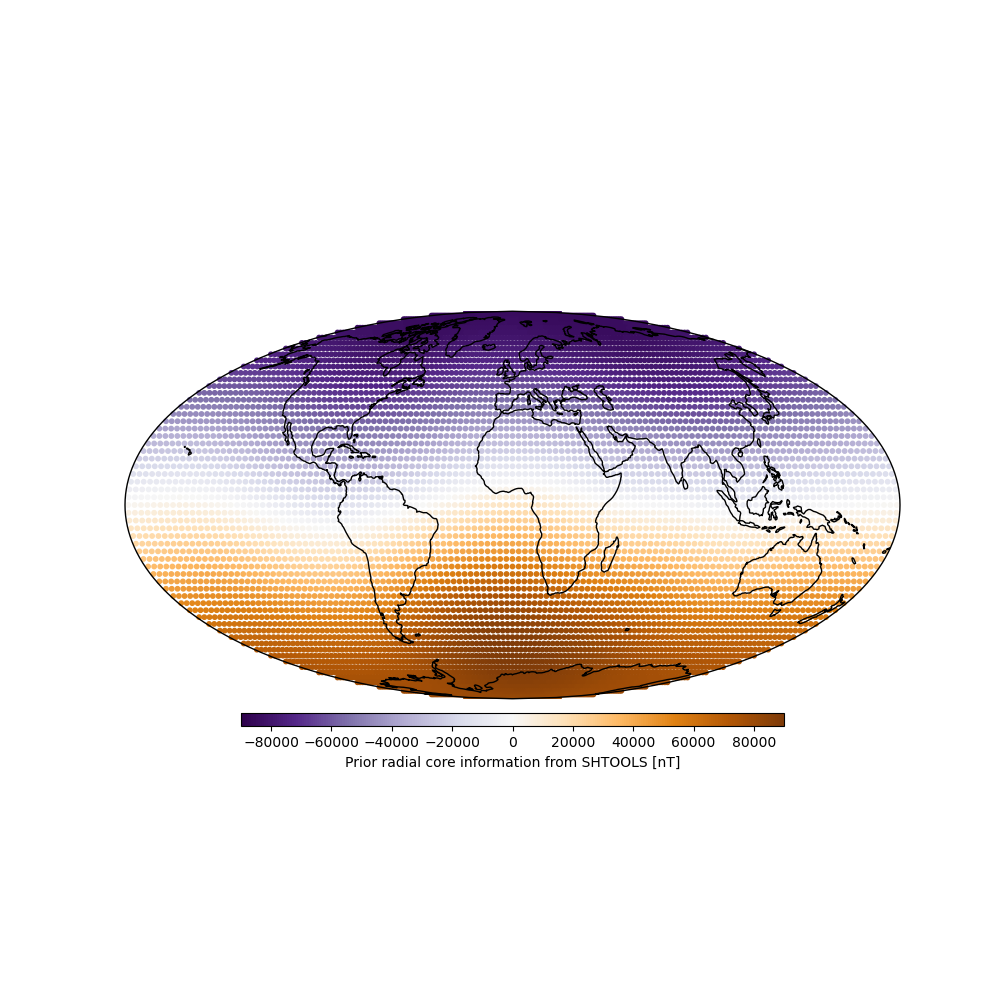

In [13]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=np.ravel(sh_grid), point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial core information from SHTOOLS")

<IPython.core.display.Javascript object>


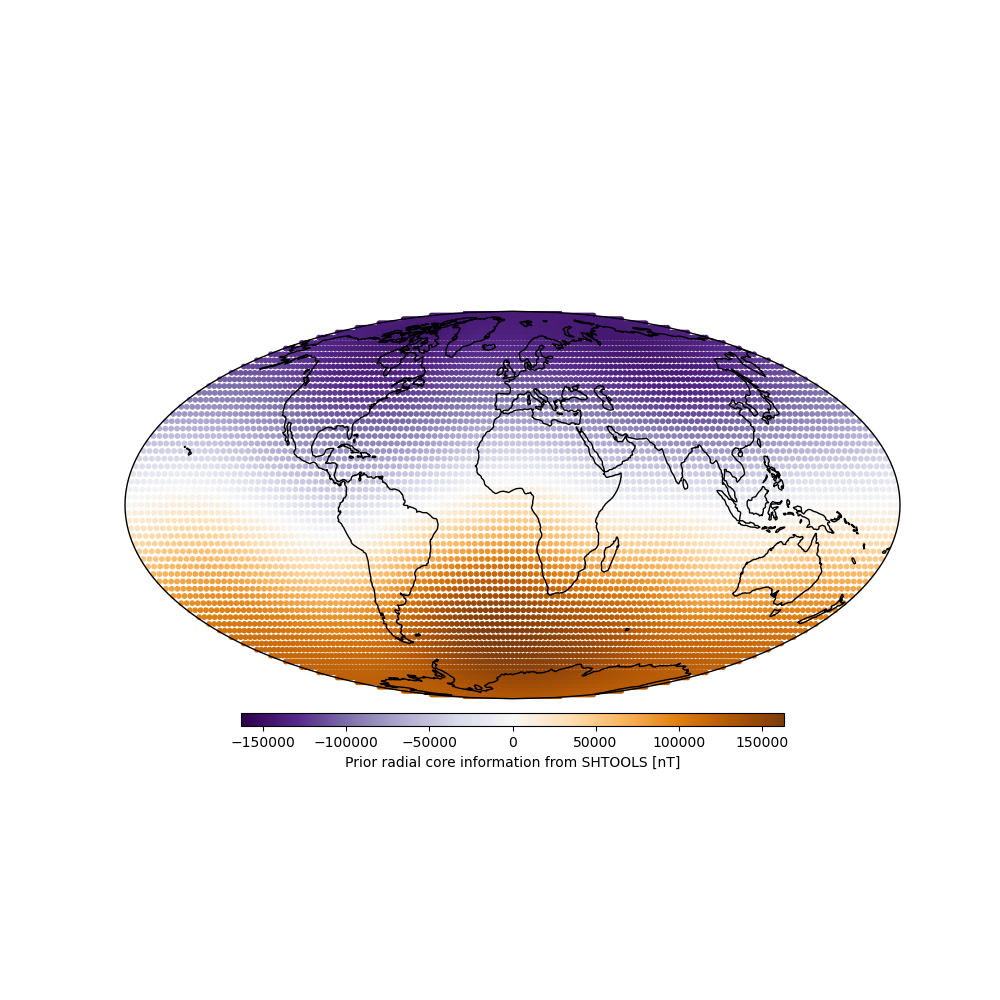

In [14]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=np.ravel(sh_grid_recon), point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial core information from SHTOOLS")

In [429]:
diff_recon.shape
rmse_diff_recon = np.sqrt(np.mean(np.power(diff_recon,2),axis=0))
print("")
print("Reconstruction RMSE:\t {}".format(rmse_diff_recon))


Reconstruction RMSE:	 [486822.37123195 483223.29197362 488861.47871538 491917.7246081
 479364.83591613 481688.68067133 482461.82729747 489636.74081106
 493782.68941842 481372.54080223]


In [430]:
# Reload plot module when making small changes
import importlib
importlib.reload(mt_util)

<module 'mikkel_tools.utility' from '/home/mikotz/spherical_direct_sequential_simulation/mikkel_tools/utility.py'>

In [516]:
#g_spec_test = []

C_cilm = pyshtools.expand.SHExpandGLQ(core.data.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1), core.grid_glq_w, core.grid_glq_zero, [2, 1, core.grid_glq_nmax])
nm_C = mt_util.array_nm(core.grid_glq_nmax)

C_corr_sh = 1/(nm_C[:,[0]]+1)*1/((core.a/core.r_cmb)**(nm_C[:,[0]]+2))

C_index = np.transpose(pyshtools.shio.SHCilmToCindex(C_cilm))
C_index = C_index[1:,:]*C_corr_sh

C_vec = mt_util.gauss_vector(C_index, core.grid_glq_nmax, i_n = 0, i_m = 1)

#g_spec.append(C_vec)

g_spec_test = C_vec
g_spec_test = np.array(g_spec_test).T
print(g_spec_test.shape)

(1680,)


In [517]:
regrid = pyshtools.expand.MakeGridGLQ(C_cilm, core.grid_glq_zero, [core.grid_glq_nmax, 2, 1])

In [518]:
regrid.shape

(41, 81)

<IPython.core.display.Javascript object>


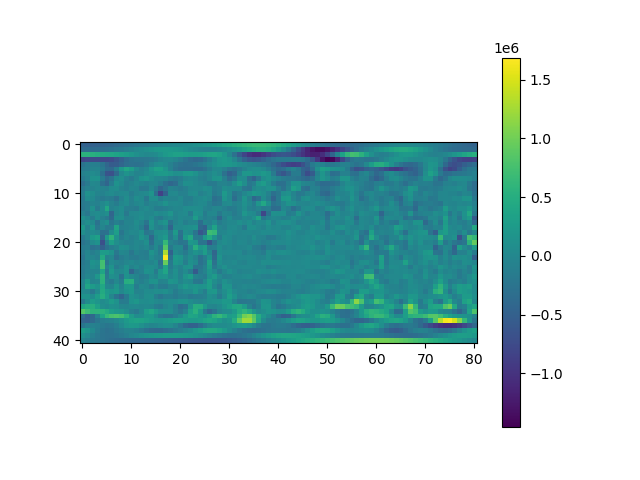

In [519]:
plt.figure()
plt.imshow(regrid)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


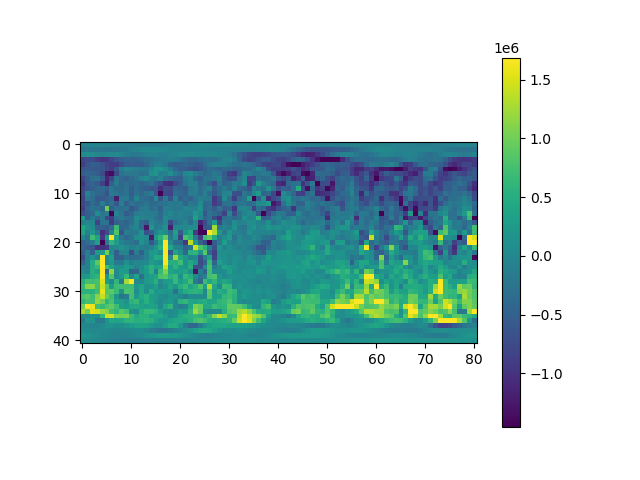

In [520]:
plt.figure()
plt.imshow(core.data.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1), vmin = np.min(regrid), vmax = np.max(regrid))
plt.colorbar()
plt.show()

In [501]:
core.data.reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1) - regrid

array([[ 430666.69830884,  439489.1669432 ,  437227.62718974, ...,
         340760.63383592,  380501.66748611,  410818.99807276],
       [ 143288.9482587 ,  146768.61837611,  137031.50064451, ...,
          97557.06540746,  112115.13037468,  129626.58678849],
       [-491946.48190097, -458108.19486093, -468040.15088658, ...,
        -545834.99562417, -589220.22923766, -553857.74969614],
       ...,
       [-220434.60962398, -138175.70189281,   -5870.44644522, ...,
         -42750.97648794, -168803.11002159, -232135.4715651 ],
       [  72382.16137265,  143250.66493996,  200778.0505101 , ...,
        -161663.42808634,  -87588.47314419,   -6796.34592506],
       [ 145726.23247677,  172579.81104613,  192792.6181846 , ...,
          19032.9442216 ,   69057.75183256,  111346.40371673]])

In [483]:
nm_C

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 2.,  0.],
       ...,
       [40., 38.],
       [40., 39.],
       [40., 40.]])

<IPython.core.display.Javascript object>


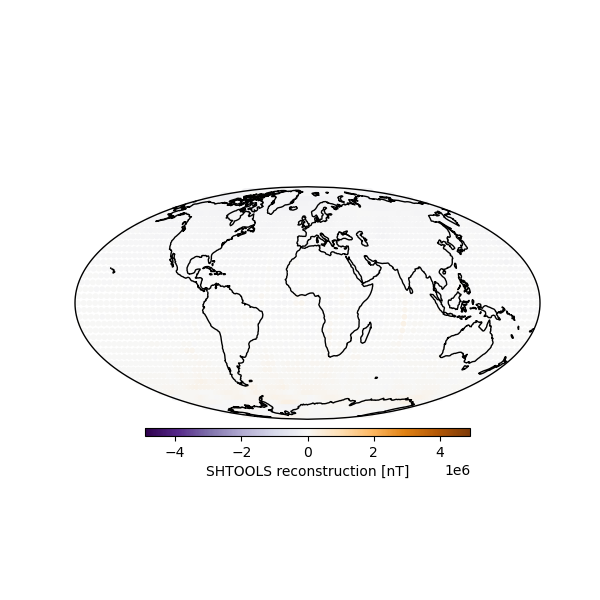

<IPython.core.display.Javascript object>


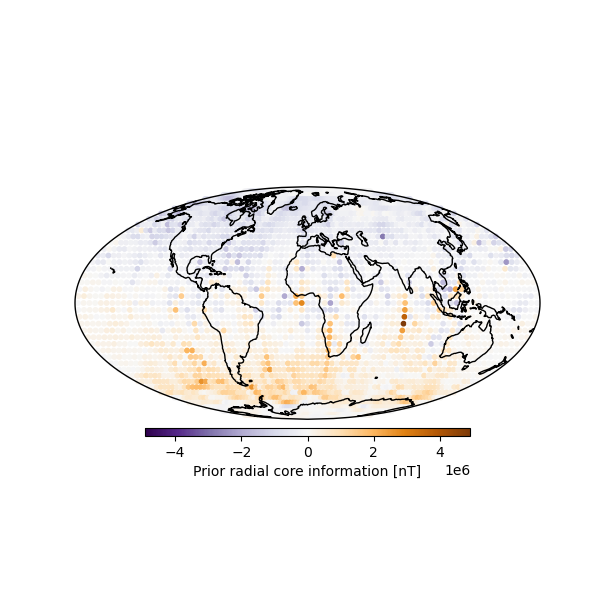

In [484]:
core.ensemble_B(g_spec_test, nmax = 40, r_at = core.r_cmb, grid_type = "glq")

mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=core.B_ensemble_glq[:,0], limits_data = core.data, point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="SHTOOLS reconstruction", figsize = (6,6))

mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=core.data, point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial core information", figsize = (6,6))

In [473]:
diff_recon = core.data-core.B_ensemble_glq[:,0]
diff_recon.shape
rmse_diff_recon = np.sqrt(np.mean(np.power(diff_recon,2)))
print("")
print("Reconstruction RMSE:\t {}".format(rmse_diff_recon))


Reconstruction RMSE:	 347338.9983831684


In [474]:
core.data

array([-38596.63406479, -38589.3726302 , -41522.35989905, ...,
       145610.53120853, 133020.54327305, 114548.53708616])

In [475]:
core.B_ensemble_glq[:,0]

array([-1123478.62274175, -1130015.12890275, -1126469.82928785, ...,
         483006.66887215,   402688.17861315,   324062.40099506])

In [476]:
core.g_prior[:20]

array([-5.1832174e+04,  3.1387632e+03,  6.8029256e+02, -1.7293821e+02,
       -3.0744615e+03,  5.0047084e+03, -7.1523230e+02,  1.1988744e+03,
        1.6893670e+03,  1.1170721e+03, -1.2274156e+02,  8.1355827e+02,
       -1.9122987e+02,  3.8518093e+02, -9.9242877e+02, -2.3483827e+02,
        2.5164042e+01,  6.5763331e+02, -7.1736585e+01, -2.0775144e+02])

In [477]:
g_spec_test[:20]

array([-5.30123390e+04,  2.71491169e+03,  6.55878109e+02, -1.55548164e+03,
       -2.21490988e+03,  4.60465120e+03, -5.31903408e+02,  6.04573151e+02,
       -2.19665003e+03,  1.01905779e+03,  1.79271221e+02,  4.23097663e+02,
       -5.18062791e+01,  3.33579648e+02, -5.36112934e+02, -6.30640444e+02,
        6.32965458e+01,  7.95672553e+02, -1.52485064e+02, -2.46314017e+02])